# ML LAB  MINI PROJECT

## WEEK 7

## PHASE-1

The overall objective of the project is to build an app with a simple UI. The app will allow the user to 
choose between 5 categories of products , for instance cell phones, clothing, shoes, software etc. On 
choosing the category of product, recommendations are displayed based on user based similarity .  
PHASE 1  – Submit a python notebook with the preliminary analysis of data  and record the objective of the project, data sources, data preparation steps etc. Identify the tech stack 
for the app. 

META DATA 

This dataset consists of reviews from amazon. The data span a period of 18 years, including ~35 million reviews up to March 2013. Reviews include product and user information, ratings, and a plaintext review. Note: this dataset contains potential duplicates, due to products whose reviews Amazon merges. A file has been added below (possible_dupes.txt.gz) to help identify products that are potentially duplicates of each other.

In [1]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns

## ABSTRACT

We need to give a option of choosing between 5 categories products for user ,for this we need to need to pick a min 5 data sets, So i have choosen 1.Watches 2.Musical_Instruments 3.Gourment_Food 4.Cell_Phones_&_Accessories 5.Beauty . Downloaded the required datasets and coverted them into txt format and then into dataframe by using parse fun.IN Phase-1 submission completed the preprocessing of dataset and mentioned about META data and Objective of Project

## OBJECTIVE

1.Convet data into a form that can be handled i.e. convert to Dataframe
2.Do preprocessing with the help of libraries and remove attributes that are not neccessary
3.Do EDA to know the data better, helps understand the characteristics of data
4.Now build a recomendation system with collaborative filtering that recomends items on user based similarty
5.Now we can deploy this model by hosting a web page UI and using Fast API
6.Final UI based recommendation for user

### Watches dataset

In [2]:
def parse(filename):
  f = open(filename, 'r')
  entry = {}
  for l in f:
    l = l.strip()
    colonPos = l.find(':')
    if colonPos == -1:
      yield entry
      entry = {}
      continue
    eName = l[:colonPos]
    rest = l[colonPos+2:]
    entry[eName] = rest
  yield entry

In [3]:
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [4]:
wt = getDF('Watches.txt')

In [5]:
wt

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,AEM9CCSE7CQ9M,"Charlie White ""Tech-Guy""",0/0,4.0,1260230400,"Unique G-Shock Design, same G-Shock Quality",Having owned two previous G-Shocks in my life ...
1,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,AA6ESFOYCNJKG,Marco Antonio Hernandez Lara,0/0,4.0,1216339200,Nice Watch,"Thats a good watch, light, comfortable, accura..."
2,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,A2X0RB3JKV4E7C,Mary Perez,1/2,5.0,1245024000,Is it battery powered or Solar/,I am ready to purchase this beautiful watch bu...
3,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",unknown,AIZ446JTDW9B5,Mike Robbins,3/3,5.0,1122422400,2005 Latest Seiko Diver Models,2005 Latest model from Seiko Model SKXA53K2. P...
4,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",unknown,A28JAKWAGDDXWF,Tukwillie,0/0,4.0,1207958400,Great watch with a few drawbacks,Here are a few observations on one of my favor...
...,...,...,...,...,...,...,...,...,...,...
68351,B000LET1KU,Seiko Kinetic Diver Orange Dial Mens Watch SKA291,unknown,A2Q1V8EBYFMXSO,"Donald L. Buckle ""Number 2 Amazon Fan""",0/1,3.0,1249171200,Great watch with terrible band,A good dive watch with a terribly uncomfortabl...
68352,B000I5M96A,SeikoClock - QXA393SRH (Size: unisex-adult),unknown,A2YDSCQB2W0C8S,"Sanjay N. Patel ""Thoomplonk""",1/1,5.0,1209686400,Quiet Sweep Wall clock,Very elegant contemporary looking quiet sweep ...
68353,B000I5M96A,SeikoClock - QXA393SRH (Size: unisex-adult),unknown,A247QMDU9ZQASZ,M. Imhoff,0/0,3.0,1272844800,Was quiet at first,"I bought this clock two years ago, and it was ..."
68354,B000ISLYYK,New Philip Persio Leather Biker Cuff Mens Squa...,unknown,A1LRT7C0CP8M3S,Papou,0/0,4.0,1181347200,Good quality Watch,The watch in itself is quite good and it is ju...


### Preprocessing and Cleaning of dataset

In [6]:
with open('Watches.txt', newline = '') as sales:
    lines = [sale for sale in csv.reader(sales, delimiter='\n') if sale!=[]]


In [7]:
tmp = []
for i in lines:
    for j in i:
        tmp.append(j.split(': '))


In [8]:
length_tmp = len(tmp)
productid =[tmp[i][1] for i in range(0,int(length_tmp),10)]
title =[tmp[i+1][1] for i in range(0,int(length_tmp),10)]
price=[tmp[i+2][1] for i in range(0,int(length_tmp),10)]
userID=[tmp[i+3][1] for i in range(0,int(length_tmp),10)]
profileName =[tmp[i+4][1] for i in range(0,int(length_tmp),10)]
helpfulness = [tmp[i+5][1] for i in range(0,int(length_tmp),10)]
score = [tmp[i+6][1] for i in range(0,int(length_tmp),10)]
time = [tmp[i+7][1] for i in range(0,int(length_tmp),10)]
summary = [tmp[i+8][1] for i in range(0,int(length_tmp),10)]
text = [tmp[i+9][1] for i in range(0,int(length_tmp),10)]

In [9]:
del(tmp,length_tmp)

In [10]:
wt = pd.DataFrame({
    'ProductID':productid,
    'Product_Name':title,
    'Price':price,
    'userID':userID,
    'User_Name':profileName,
    'helpfulness':helpfulness,
    'rate':score,
    'time':time,
    'summary':summary,
    'text':text
})
wt

,ProductID,Product_Name,Price,userID,User_Name,helpfulness,rate,time,summary,text
0,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,AEM9CCSE7CQ9M,"Charlie White ""Tech-Guy""",0/0,4.0,1260230400,"Unique G-Shock Design, same G-Shock Quality",Having owned two previous G-Shocks in my life ...
1,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,AA6ESFOYCNJKG,Marco Antonio Hernandez Lara,0/0,4.0,1216339200,Nice Watch,"Thats a good watch, light, comfortable, accura..."
2,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,A2X0RB3JKV4E7C,Mary Perez,1/2,5.0,1245024000,Is it battery powered or Solar/,I am ready to purchase this beautiful watch bu...
3,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",unknown,AIZ446JTDW9B5,Mike Robbins,3/3,5.0,1122422400,2005 Latest Seiko Diver Models,2005 Latest model from Seiko Model SKXA53K2. P...
4,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",unknown,A28JAKWAGDDXWF,Tukwillie,0/0,4.0,1207958400,Great watch with a few drawbacks,Here are a few observations on one of my favor...
...,...,...,...,...,...,...,...,...,...,...
68351,B000LET1KU,Seiko Kinetic Diver Orange Dial Mens Watch SKA291,unknown,A2Q1V8EBYFMXSO,"Donald L. Buckle ""Number 2 Amazon Fan""",0/1,3.0,1249171200,Great watch with terrible band,A good dive watch with a terribly uncomfortabl...
68352,B000I5M96A,SeikoClock - QXA393SRH (Size,unknown,A2YDSCQB2W0C8S,"Sanjay N. Patel ""Thoomplonk""",1/1,5.0,1209686400,Quiet Sweep Wall clock,Very elegant contemporary looking quiet sweep ...
68353,B000I5M96A,SeikoClock - QXA393SRH (Size,unknown,A247QMDU9ZQASZ,M. Imhoff,0/0,3.0,1272844800,Was quiet at first,"I bought this clock two years ago, and it was ..."
68354,B000ISLYYK,New Philip Persio Leather Biker Cuff Mens Squa...,unknown,A1LRT7C0CP8M3S,Papou,0/0,4.0,1181347200,Good quality Watch,The watch in itself is quite good and it is ju...


In [11]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68356 entries, 0 to 68355
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     68356 non-null  object
 1   Product_Name  68356 non-null  object
 2   Price         68356 non-null  object
 3   userID        68356 non-null  object
 4   User_Name     68356 non-null  object
 5   helpfulness   68356 non-null  object
 6   rate          68356 non-null  object
 7   time          68356 non-null  object
 8   summary       68356 non-null  object
 9   text          68356 non-null  object
dtypes: object(10)
memory usage: 5.2+ MB


In [12]:
wt= wt.replace('unknown',0)

In [13]:
wt = wt.astype({'Price':'float64',
          'rate': 'float64',
          })

In [14]:
wt = wt.replace(0.0,np.NaN)

In [15]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68356 entries, 0 to 68355
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     68356 non-null  object 
 1   Product_Name  68356 non-null  object 
 2   Price         37561 non-null  float64
 3   userID        68034 non-null  object 
 4   User_Name     68034 non-null  object 
 5   helpfulness   68356 non-null  object 
 6   rate          68356 non-null  float64
 7   time          68356 non-null  object 
 8   summary       68355 non-null  object 
 9   text          68356 non-null  object 
dtypes: float64(2), object(8)
memory usage: 5.2+ MB


As rate may be factor for deciding product we assume rate>3 as good , rate=avg ,rate < bad

In [16]:
wt['type_of_review'] = wt['rate'].apply(lambda rate: "GOOD" if rate>=4.0 else ("AVG" if rate<4.0 and rate>=3.0 else "BAD"))
reviews = wt[['text','type_of_review']]

In [17]:
wt

,ProductID,Product_Name,Price,userID,User_Name,helpfulness,rate,time,summary,text,type_of_review
0,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,NaN,AEM9CCSE7CQ9M,"Charlie White ""Tech-Guy""",0/0,4.0,1260230400,"Unique G-Shock Design, same G-Shock Quality",Having owned two previous G-Shocks in my life ...,GOOD
1,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,NaN,AA6ESFOYCNJKG,Marco Antonio Hernandez Lara,0/0,4.0,1216339200,Nice Watch,"Thats a good watch, light, comfortable, accura...",GOOD
2,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,NaN,A2X0RB3JKV4E7C,Mary Perez,1/2,5.0,1245024000,Is it battery powered or Solar/,I am ready to purchase this beautiful watch bu...,GOOD
3,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",NaN,AIZ446JTDW9B5,Mike Robbins,3/3,5.0,1122422400,2005 Latest Seiko Diver Models,2005 Latest model from Seiko Model SKXA53K2. P...,GOOD
4,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",NaN,A28JAKWAGDDXWF,Tukwillie,0/0,4.0,1207958400,Great watch with a few drawbacks,Here are a few observations on one of my favor...,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
68351,B000LET1KU,Seiko Kinetic Diver Orange Dial Mens Watch SKA291,NaN,A2Q1V8EBYFMXSO,"Donald L. Buckle ""Number 2 Amazon Fan""",0/1,3.0,1249171200,Great watch with terrible band,A good dive watch with a terribly uncomfortabl...,AVG
68352,B000I5M96A,SeikoClock - QXA393SRH (Size,NaN,A2YDSCQB2W0C8S,"Sanjay N. Patel ""Thoomplonk""",1/1,5.0,1209686400,Quiet Sweep Wall clock,Very elegant contemporary looking quiet sweep ...,GOOD
68353,B000I5M96A,SeikoClock - QXA393SRH (Size,NaN,A247QMDU9ZQASZ,M. Imhoff,0/0,3.0,1272844800,Was quiet at first,"I bought this clock two years ago, and it was ...",AVG
68354,B000ISLYYK,New Philip Persio Leather Biker Cuff Mens Squa...,NaN,A1LRT7C0CP8M3S,Papou,0/0,4.0,1181347200,Good quality Watch,The watch in itself is quite good and it is ju...,GOOD


Text(0.5, 0, 'Type of review')

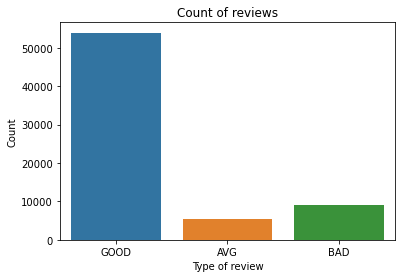

In [18]:
from datetime import datetime

ax = sns.countplot(
    data = wt,
    x = wt['type_of_review']
)
ax.set_title('Count of reviews')
ax.set_ylabel('Count')
ax.set_xlabel('Type of review')

In [19]:
from datetime import datetime

wt['time'] = wt['time'].apply(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d'))

In [20]:
wt['time'] = pd.to_datetime(wt['time'])
wt['year'] = [x.year for x in wt['time']]

<AxesSubplot:xlabel='year', ylabel='count'>

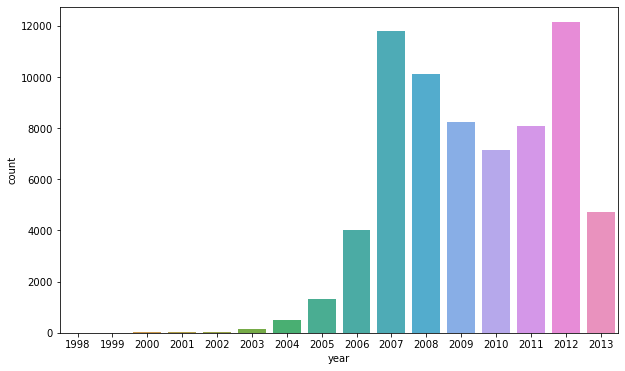

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(
    ax=ax,
    data = wt,
    x = wt['year']
)

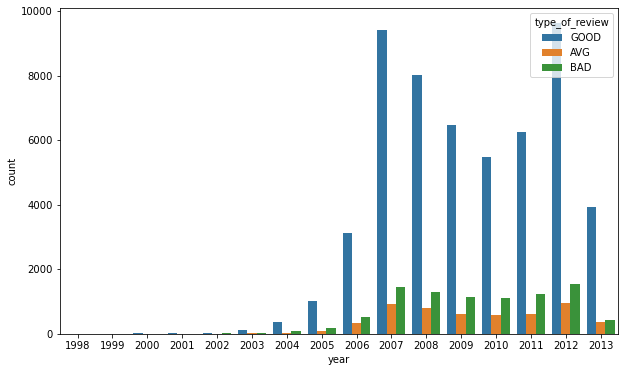

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(
    ax=ax,
    data = wt,
    x = wt['year'],
    hue = wt['type_of_review']
)
maxi = int(wt['year'].mode())

Year 2012 has highest good rating

### MUSICAL_INSTRUMENTS DATASET

In [23]:
def parse(filename):
  f = open(filename, 'r')
  entry = {}
  for l in f:
    l = l.strip()
    colonPos = l.find(':')
    if colonPos == -1:
      yield entry
      entry = {}
      continue
    eName = l[:colonPos]
    rest = l[colonPos+2:]
    entry[eName] = rest
  yield entry

In [24]:
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [25]:
mt = getDF('Musical_Instruments.txt')

In [26]:
mt

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B0009F5ZXS,Dimarzio Virtual Hot PAF Bridge - Black Finish...,69.00,A3915SRVUGEXY5,plinker,2/2,3.0,1336780800,Wrong pickup description,"The name and description of this Pickup, Virtu..."
1,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,A31KXTOQNTWUVM,Bill Board,9/9,5.0,1241308800,Now I won't have to invest in a Leslie speaker!,No other way to put it: this thing is WONDERFU...
2,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,A1EJ0E61P5F3YL,Laus Deo,3/3,4.0,1316649600,Fun Toy,This effect has an interesting sound somewhere...
3,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,A30ROM67HSGKWL,Al,2/2,5.0,1313712000,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,This pedal is cheaply made but it sounds terri...
4,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,AGETSICLTBAQO,Dave Puzz,1/1,5.0,1318032000,Leslie in a nutshell,Danelectro DJ-20C Rocky Road Spin Speaker Mini...
...,...,...,...,...,...,...,...,...,...,...
85400,B0002L05ZC,Behringer DJX700 Professional 5-Channel DJ Mix...,unknown,A1F7MBQ7BOZS9V,Lucas De Paiva Pirolla,1/1,5.0,1233705600,Nice mixer!,"It's fulfiled with features, not a regular mix..."
85401,B0002L05ZC,Behringer DJX700 Professional 5-Channel DJ Mix...,unknown,A2347QQQRWUCW5,kat,1/2,4.0,1294704000,how does this compare to DJX750?,I used to have this mixer. I was used to using...
85402,B0002L05ZC,Behringer DJX700 Professional 5-Channel DJ Mix...,unknown,AZI4QIZ3C681J,B. Carvalho,1/2,3.0,1255910400,pretty good For a begginer!,if u r learning dont spend money in a pioneer ...
85403,B0002L05ZC,Behringer DJX700 Professional 5-Channel DJ Mix...,unknown,A262ERC4E5FRAA,"H. Williams ""DJ STEEL WILL""",8/15,5.0,1178150400,BETTER THAN ADVERTISED!!!,"I PURCHACED THIS A YEAR AGO, AND I STILL ENJOY..."


In [27]:
with open('Musical_Instruments.txt', newline = '') as sales:
    lines = [sale for sale in csv.reader(sales, delimiter='\n') if sale!=[]]

In [28]:
tmp = []
for i in lines:
    for j in i:
        tmp.append(j.split(': '))


In [29]:
length_tmp = len(tmp)
productid =[tmp[i][1] for i in range(0,int(length_tmp),10)]
title =[tmp[i+1][1] for i in range(0,int(length_tmp),10)]
price=[tmp[i+2][1] for i in range(0,int(length_tmp),10)]
userID=[tmp[i+3][1] for i in range(0,int(length_tmp),10)]
profileName =[tmp[i+4][1] for i in range(0,int(length_tmp),10)]
helpfulness = [tmp[i+5][1] for i in range(0,int(length_tmp),10)]
score = [tmp[i+6][1] for i in range(0,int(length_tmp),10)]
time = [tmp[i+7][1] for i in range(0,int(length_tmp),10)]
summary = [tmp[i+8][1] for i in range(0,int(length_tmp),10)]
text = [tmp[i+9][1] for i in range(0,int(length_tmp),10)]

In [30]:
del(tmp,length_tmp)

In [31]:
mt = pd.DataFrame({
    'ProductID':productid,
    'Product_Name':title,
    'Price':price,
    'userID':userID,
    'User_Name':profileName,
    'helpfulness':helpfulness,
    'rate':score,
    'time':time,
    'summary':summary,
    'text':text
})
mt

,ProductID,Product_Name,Price,userID,User_Name,helpfulness,rate,time,summary,text
0,B0009F5ZXS,Dimarzio Virtual Hot PAF Bridge - Black Finish...,69.00,A3915SRVUGEXY5,plinker,2/2,3.0,1336780800,Wrong pickup description,"The name and description of this Pickup, Virtu..."
1,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,A31KXTOQNTWUVM,Bill Board,9/9,5.0,1241308800,Now I won't have to invest in a Leslie speaker!,No other way to put it
2,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,A1EJ0E61P5F3YL,Laus Deo,3/3,4.0,1316649600,Fun Toy,This effect has an interesting sound somewhere...
3,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,A30ROM67HSGKWL,Al,2/2,5.0,1313712000,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,This pedal is cheaply made but it sounds terri...
4,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,AGETSICLTBAQO,Dave Puzz,1/1,5.0,1318032000,Leslie in a nutshell,Danelectro DJ-20C Rocky Road Spin Speaker Mini...
...,...,...,...,...,...,...,...,...,...,...
85400,B0002L05ZC,Behringer DJX700 Professional 5-Channel DJ Mix...,unknown,A1F7MBQ7BOZS9V,Lucas De Paiva Pirolla,1/1,5.0,1233705600,Nice mixer!,"It's fulfiled with features, not a regular mix..."
85401,B0002L05ZC,Behringer DJX700 Professional 5-Channel DJ Mix...,unknown,A2347QQQRWUCW5,kat,1/2,4.0,1294704000,how does this compare to DJX750?,I used to have this mixer. I was used to using...
85402,B0002L05ZC,Behringer DJX700 Professional 5-Channel DJ Mix...,unknown,AZI4QIZ3C681J,B. Carvalho,1/2,3.0,1255910400,pretty good For a begginer!,if u r learning dont spend money in a pioneer ...
85403,B0002L05ZC,Behringer DJX700 Professional 5-Channel DJ Mix...,unknown,A262ERC4E5FRAA,"H. Williams ""DJ STEEL WILL""",8/15,5.0,1178150400,BETTER THAN ADVERTISED!!!,"I PURCHACED THIS A YEAR AGO, AND I STILL ENJOY..."


In [32]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85405 entries, 0 to 85404
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     85405 non-null  object
 1   Product_Name  85405 non-null  object
 2   Price         85405 non-null  object
 3   userID        85405 non-null  object
 4   User_Name     85405 non-null  object
 5   helpfulness   85405 non-null  object
 6   rate          85405 non-null  object
 7   time          85405 non-null  object
 8   summary       85405 non-null  object
 9   text          85405 non-null  object
dtypes: object(10)
memory usage: 6.5+ MB


In [33]:
mt= mt.replace('unknown',0)

In [34]:
mt = mt.astype({'Price':'float64',
          'rate': 'float64',
          })

In [35]:
mt = mt.replace(0.0,np.NaN)

In [36]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85405 entries, 0 to 85404
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     85405 non-null  object 
 1   Product_Name  85405 non-null  object 
 2   Price         66253 non-null  float64
 3   userID        84409 non-null  object 
 4   User_Name     84408 non-null  object 
 5   helpfulness   85405 non-null  object 
 6   rate          85405 non-null  float64
 7   time          85405 non-null  object 
 8   summary       85405 non-null  object 
 9   text          85405 non-null  object 
dtypes: float64(2), object(8)
memory usage: 6.5+ MB


As rate may be factor for deciding product we assume rate>3 as good , rate=avg ,rate < bad

In [37]:
mt['type_of_review'] = mt['rate'].apply(lambda rate: "GOOD" if rate>=4.0 else ("AVG" if rate<4.0 and rate>=3.0 else "BAD"))
reviews = mt[['text','type_of_review']]

In [38]:
mt

,ProductID,Product_Name,Price,userID,User_Name,helpfulness,rate,time,summary,text,type_of_review
0,B0009F5ZXS,Dimarzio Virtual Hot PAF Bridge - Black Finish...,69.00,A3915SRVUGEXY5,plinker,2/2,3.0,1336780800,Wrong pickup description,"The name and description of this Pickup, Virtu...",AVG
1,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,A31KXTOQNTWUVM,Bill Board,9/9,5.0,1241308800,Now I won't have to invest in a Leslie speaker!,No other way to put it,GOOD
2,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,A1EJ0E61P5F3YL,Laus Deo,3/3,4.0,1316649600,Fun Toy,This effect has an interesting sound somewhere...,GOOD
3,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,A30ROM67HSGKWL,Al,2/2,5.0,1313712000,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,This pedal is cheaply made but it sounds terri...,GOOD
4,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,AGETSICLTBAQO,Dave Puzz,1/1,5.0,1318032000,Leslie in a nutshell,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
85400,B0002L05ZC,Behringer DJX700 Professional 5-Channel DJ Mix...,NaN,A1F7MBQ7BOZS9V,Lucas De Paiva Pirolla,1/1,5.0,1233705600,Nice mixer!,"It's fulfiled with features, not a regular mix...",GOOD
85401,B0002L05ZC,Behringer DJX700 Professional 5-Channel DJ Mix...,NaN,A2347QQQRWUCW5,kat,1/2,4.0,1294704000,how does this compare to DJX750?,I used to have this mixer. I was used to using...,GOOD
85402,B0002L05ZC,Behringer DJX700 Professional 5-Channel DJ Mix...,NaN,AZI4QIZ3C681J,B. Carvalho,1/2,3.0,1255910400,pretty good For a begginer!,if u r learning dont spend money in a pioneer ...,AVG
85403,B0002L05ZC,Behringer DJX700 Professional 5-Channel DJ Mix...,NaN,A262ERC4E5FRAA,"H. Williams ""DJ STEEL WILL""",8/15,5.0,1178150400,BETTER THAN ADVERTISED!!!,"I PURCHACED THIS A YEAR AGO, AND I STILL ENJOY...",GOOD


Text(0.5, 0, 'Type of review')

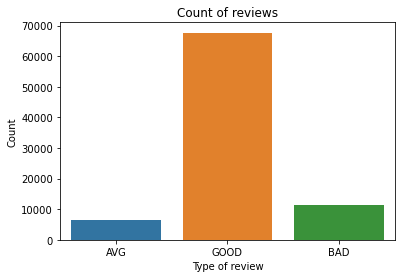

In [39]:
from datetime import datetime

ax = sns.countplot(
    data = mt,
    x = mt['type_of_review']
)
ax.set_title('Count of reviews')
ax.set_ylabel('Count')
ax.set_xlabel('Type of review')

In [40]:
from datetime import datetime

mt['time'] = mt['time'].apply(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d'))

In [41]:
mt['time'] = pd.to_datetime(mt['time'])
mt['year'] = [x.year for x in mt['time']]

<AxesSubplot:xlabel='year', ylabel='count'>

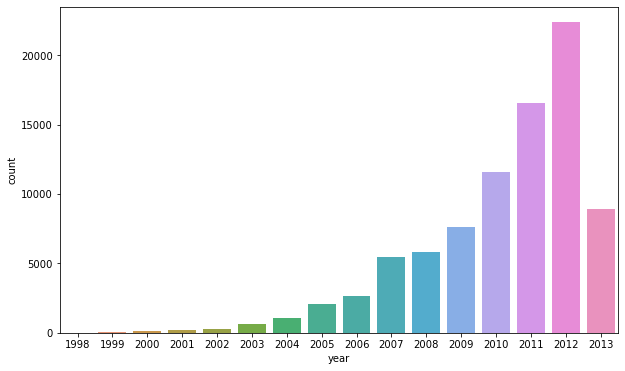

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(
    ax=ax,
    data = mt,
    x = mt['year']
)

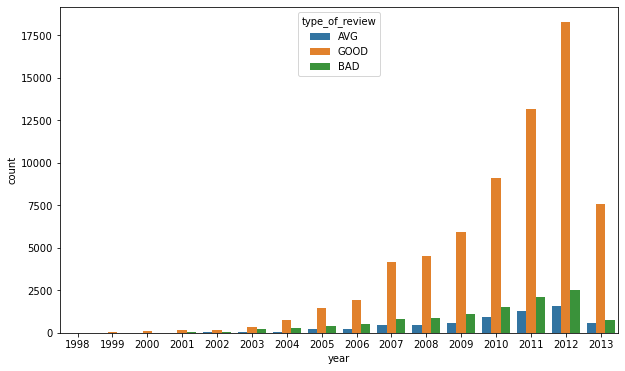

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(
    ax=ax,
    data = mt,
    x = mt['year'],
    hue = mt['type_of_review']
)
maxi = int(mt['year'].mode())

2012 has good rate more 

### Gourment_Food dataset

In [44]:
def parse(filename):
  f = open(filename, 'r')
  entry = {}
  for l in f:
    l = l.strip()
    colonPos = l.find(':')
    if colonPos == -1:
      yield entry
      entry = {}
      continue
    eName = l[:colonPos]
    rest = l[colonPos+2:]
    entry[eName] = rest
  yield entry

In [45]:
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [46]:
gt = getDF('Gourmet_Foods.txt')

In [47]:
gt

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000EVS4TY,"Arrowhead Mills Cookie Mix, Chocolate Chip, 12...",unknown,A2SRVDDDOQ8QJL,MJ23447,2/4,4.0,1206576000,Delicious cookie mix,I thought it was funny that I bought this prod...
1,B0000DF3IX,Paprika Hungarian Sweet,unknown,A244MHL2UN2EYL,"P. J. Whiting ""book cook""",0/0,5.0,1127088000,Sweet Paprika: A sweet ingredient!,While in Hungary we were given a recipe for Hu...
2,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),26.82,A3FL7SXVYMC5NR,Brittany,3/3,5.0,1138147200,Best Cereal BY FAR,"Without a doubt, I would recommend this wholes..."
3,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),26.82,A12IDQSS4OW33B,Robin Goodfellow,3/3,5.0,1118016000,Oh!,This cereal is so sweet....yet so good for you...
4,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),26.82,A2GZKHC1M4PKF4,lostinseganet,2/2,3.0,1206489600,Oh's what a cereal! (^_^) ...Oh's what a price...,Man I love Oh's cereal. It is really great to ...
...,...,...,...,...,...,...,...,...,...,...
63536,B0001218VW,Italian Mascarpone Cheese - 17.6oz,unknown,A2QKDLLOIRGVVV,M. Kennedy,4/5,1.0,1224547200,"You're kidding, right?",The price is now up to $14.75 for a 17 oz cont...
63537,B0001218VW,Italian Mascarpone Cheese - 17.6oz,unknown,A3DQYDFJHONEZ0,Shonda,1/1,5.0,1312675200,Delicious,Well honestly I never thought I'd by this chee...
63538,B000CR3Z8U,"Wild Oats Natural Unsulphured Papaya Spears, 8...",unknown,AZ759JTT8494Q,J. Briggs,2/2,1.0,1169683200,Don't Bother,"I ordered two orders of these. One ""order"" is ..."
63539,B000CR3Z8U,"Wild Oats Natural Unsulphured Papaya Spears, 8...",unknown,A109EGA5Q5VN4L,Tea Lover,0/0,4.0,1174176000,Good Quality & Good Value,I was pleasantly surprised at the quality and ...


In [48]:
with open('Gourmet_Foods.txt', newline = '') as sales:
    lines = [sale for sale in csv.reader(sales, delimiter='\n') if sale!=[]]


In [49]:
tmp = []
for i in lines:
    for j in i:
        tmp.append(j.split(': '))


In [50]:
length_tmp = len(tmp)
productid =[tmp[i][1] for i in range(0,int(length_tmp),10)]
title =[tmp[i+1][1] for i in range(0,int(length_tmp),10)]
price=[tmp[i+2][1] for i in range(0,int(length_tmp),10)]
userID=[tmp[i+3][1] for i in range(0,int(length_tmp),10)]
profileName =[tmp[i+4][1] for i in range(0,int(length_tmp),10)]
helpfulness = [tmp[i+5][1] for i in range(0,int(length_tmp),10)]
score = [tmp[i+6][1] for i in range(0,int(length_tmp),10)]
time = [tmp[i+7][1] for i in range(0,int(length_tmp),10)]
summary = [tmp[i+8][1] for i in range(0,int(length_tmp),10)]
text = [tmp[i+9][1] for i in range(0,int(length_tmp),10)]

In [51]:
del(tmp,length_tmp)

In [52]:
gt = pd.DataFrame({
    'ProductID':productid,
    'Product_Name':title,
    'Price':price,
    'userID':userID,
    'User_Name':profileName,
    'helpfulness':helpfulness,
    'rate':score,
    'time':time,
    'summary':summary,
    'text':text
})
gt

,ProductID,Product_Name,Price,userID,User_Name,helpfulness,rate,time,summary,text
0,B000EVS4TY,"Arrowhead Mills Cookie Mix, Chocolate Chip, 12...",unknown,A2SRVDDDOQ8QJL,MJ23447,2/4,4.0,1206576000,Delicious cookie mix,I thought it was funny that I bought this prod...
1,B0000DF3IX,Paprika Hungarian Sweet,unknown,A244MHL2UN2EYL,"P. J. Whiting ""book cook""",0/0,5.0,1127088000,Sweet Paprika,While in Hungary we were given a recipe for Hu...
2,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),26.82,A3FL7SXVYMC5NR,Brittany,3/3,5.0,1138147200,Best Cereal BY FAR,"Without a doubt, I would recommend this wholes..."
3,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),26.82,A12IDQSS4OW33B,Robin Goodfellow,3/3,5.0,1118016000,Oh!,This cereal is so sweet....yet so good for you...
4,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),26.82,A2GZKHC1M4PKF4,lostinseganet,2/2,3.0,1206489600,Oh's what a cereal! (^_^) ...Oh's what a price...,Man I love Oh's cereal. It is really great to ...
...,...,...,...,...,...,...,...,...,...,...
63536,B0001218VW,Italian Mascarpone Cheese - 17.6oz,unknown,A2QKDLLOIRGVVV,M. Kennedy,4/5,1.0,1224547200,"You're kidding, right?",The price is now up to $14.75 for a 17 oz cont...
63537,B0001218VW,Italian Mascarpone Cheese - 17.6oz,unknown,A3DQYDFJHONEZ0,Shonda,1/1,5.0,1312675200,Delicious,Well honestly I never thought I'd by this chee...
63538,B000CR3Z8U,"Wild Oats Natural Unsulphured Papaya Spears, 8...",unknown,AZ759JTT8494Q,J. Briggs,2/2,1.0,1169683200,Don't Bother,"I ordered two orders of these. One ""order"" is ..."
63539,B000CR3Z8U,"Wild Oats Natural Unsulphured Papaya Spears, 8...",unknown,A109EGA5Q5VN4L,Tea Lover,0/0,4.0,1174176000,Good Quality & Good Value,I was pleasantly surprised at the quality and ...


In [53]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63541 entries, 0 to 63540
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     63541 non-null  object
 1   Product_Name  63541 non-null  object
 2   Price         63541 non-null  object
 3   userID        63541 non-null  object
 4   User_Name     63541 non-null  object
 5   helpfulness   63541 non-null  object
 6   rate          63541 non-null  object
 7   time          63541 non-null  object
 8   summary       63541 non-null  object
 9   text          63541 non-null  object
dtypes: object(10)
memory usage: 4.8+ MB


In [54]:
gt= gt.replace('unknown',0)

In [55]:
gt = gt.astype({'Price':'float64',
          'rate': 'float64',
          })

In [56]:
gt = gt.replace(0.0,np.NaN)

In [57]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63541 entries, 0 to 63540
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     63541 non-null  object 
 1   Product_Name  63541 non-null  object 
 2   Price         50277 non-null  float64
 3   userID        63242 non-null  object 
 4   User_Name     63242 non-null  object 
 5   helpfulness   63541 non-null  object 
 6   rate          63541 non-null  float64
 7   time          63541 non-null  object 
 8   summary       63541 non-null  object 
 9   text          63541 non-null  object 
dtypes: float64(2), object(8)
memory usage: 4.8+ MB


As rate may be factor for deciding product we assume rate>3 as good , rate=avg ,rate < bad

In [58]:
gt['type_of_review'] = gt['rate'].apply(lambda rate: "GOOD" if rate>=4.0 else ("AVG" if rate<4.0 and rate>=3.0 else "BAD"))
reviews = gt[['text','type_of_review']]

In [59]:
gt

,ProductID,Product_Name,Price,userID,User_Name,helpfulness,rate,time,summary,text,type_of_review
0,B000EVS4TY,"Arrowhead Mills Cookie Mix, Chocolate Chip, 12...",NaN,A2SRVDDDOQ8QJL,MJ23447,2/4,4.0,1206576000,Delicious cookie mix,I thought it was funny that I bought this prod...,GOOD
1,B0000DF3IX,Paprika Hungarian Sweet,NaN,A244MHL2UN2EYL,"P. J. Whiting ""book cook""",0/0,5.0,1127088000,Sweet Paprika,While in Hungary we were given a recipe for Hu...,GOOD
2,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),26.82,A3FL7SXVYMC5NR,Brittany,3/3,5.0,1138147200,Best Cereal BY FAR,"Without a doubt, I would recommend this wholes...",GOOD
3,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),26.82,A12IDQSS4OW33B,Robin Goodfellow,3/3,5.0,1118016000,Oh!,This cereal is so sweet....yet so good for you...,GOOD
4,B0002QF1LK,Quaker Honey Graham Oh's 10.5 oz - (6 pack),26.82,A2GZKHC1M4PKF4,lostinseganet,2/2,3.0,1206489600,Oh's what a cereal! (^_^) ...Oh's what a price...,Man I love Oh's cereal. It is really great to ...,AVG
...,...,...,...,...,...,...,...,...,...,...,...
63536,B0001218VW,Italian Mascarpone Cheese - 17.6oz,NaN,A2QKDLLOIRGVVV,M. Kennedy,4/5,1.0,1224547200,"You're kidding, right?",The price is now up to $14.75 for a 17 oz cont...,BAD
63537,B0001218VW,Italian Mascarpone Cheese - 17.6oz,NaN,A3DQYDFJHONEZ0,Shonda,1/1,5.0,1312675200,Delicious,Well honestly I never thought I'd by this chee...,GOOD
63538,B000CR3Z8U,"Wild Oats Natural Unsulphured Papaya Spears, 8...",NaN,AZ759JTT8494Q,J. Briggs,2/2,1.0,1169683200,Don't Bother,"I ordered two orders of these. One ""order"" is ...",BAD
63539,B000CR3Z8U,"Wild Oats Natural Unsulphured Papaya Spears, 8...",NaN,A109EGA5Q5VN4L,Tea Lover,0/0,4.0,1174176000,Good Quality & Good Value,I was pleasantly surprised at the quality and ...,GOOD


Text(0.5, 0, 'Type of review')

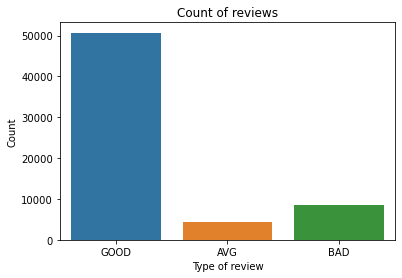

In [60]:
from datetime import datetime

ax = sns.countplot(
    data = gt,
    x = gt['type_of_review']
)
ax.set_title('Count of reviews')
ax.set_ylabel('Count')
ax.set_xlabel('Type of review')

In [61]:
from datetime import datetime

gt['time'] = gt['time'].apply(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d'))

In [62]:
gt['time'] = pd.to_datetime(gt['time'])
gt['year'] = [x.year for x in gt['time']]

<AxesSubplot:xlabel='year', ylabel='count'>

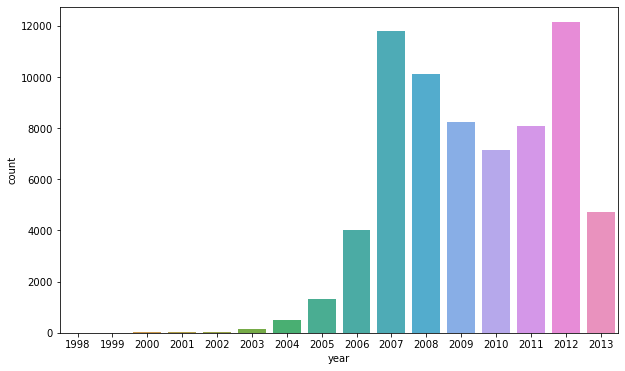

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(
    ax=ax,
    data = wt,
    x = wt['year']
)

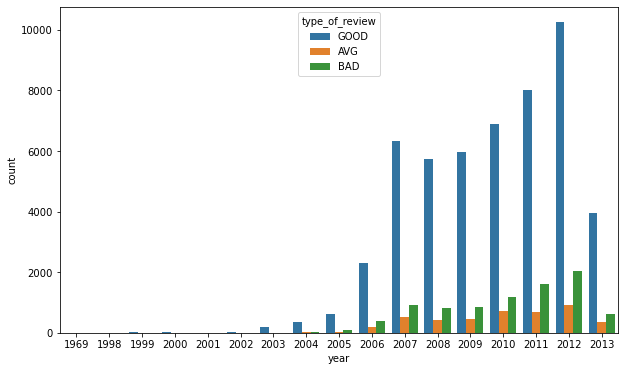

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(
    ax=ax,
    data = gt,
    x = gt['year'],
    hue = gt['type_of_review']
)
maxi = int(gt['year'].mode())

## Cell_Phones_&_Accessories dataset

In [65]:
def parse(filename):
  f = open(filename, 'r')
  entry = {}
  for l in f:
    l = l.strip()
    colonPos = l.find(':')
    if colonPos == -1:
      yield entry
      entry = {}
      continue
    eName = l[:colonPos]
    rest = l[colonPos+2:]
    entry[eName] = rest
  yield entry


In [66]:
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [67]:
ct = getDF('Cell_Phones_&_Accessories.txt')

In [68]:
ct

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1.0,1233360000,Don't buy!,"First of all, the company took my money and se..."
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4.0,1186704000,good,works real good....a little hard to set up...w...
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4.0,1146182400,No instructions included...,The price was right for this cable ($11.95+$4....
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1.0,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB ch...
...,...,...,...,...,...,...,...,...,...,...
78925,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2GO73D6XKOJ9H,I. Vidyakin,9/9,4.0,1158710400,"great sound quality, good battery life, averag...",I got this headset because I like the SonyEric...
78926,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A1DYNKV8KPEPTQ,S. Pandya,2/2,4.0,1160784000,Excellent quality at an affordable price,I have owned this product for over two weeks n...
78927,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2J6UIA8QP0QX5,T. Andrews,0/0,5.0,1173744000,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,I bought this item for my husband. He really l...
78928,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2DP6EPPQAIL3C,David M. Cantrell,0/0,5.0,1171584000,"works great, competitively priced",I bought this item after I shopped in the loca...


In [69]:
with open('Cell_Phones_&_Accessories.txt', newline = '') as sales:
    lines = [sale for sale in csv.reader(sales, delimiter='\n') if sale!=[]]


In [70]:
tmp = []
for i in lines:
    for j in i:
        tmp.append(j.split(': '))


In [71]:
length_tmp = len(tmp)
productid =[tmp[i][1] for i in range(0,int(length_tmp),10)]
title =[tmp[i+1][1] for i in range(0,int(length_tmp),10)]
price=[tmp[i+2][1] for i in range(0,int(length_tmp),10)]
userID=[tmp[i+3][1] for i in range(0,int(length_tmp),10)]
profileName =[tmp[i+4][1] for i in range(0,int(length_tmp),10)]
helpfulness = [tmp[i+5][1] for i in range(0,int(length_tmp),10)]
score = [tmp[i+6][1] for i in range(0,int(length_tmp),10)]
time = [tmp[i+7][1] for i in range(0,int(length_tmp),10)]
summary = [tmp[i+8][1] for i in range(0,int(length_tmp),10)]
text = [tmp[i+9][1] for i in range(0,int(length_tmp),10)]

In [72]:
del(tmp,length_tmp)

In [73]:
ct = pd.DataFrame({
    'ProductID':productid,
    'Product_Name':title,
    'Price':price,
    'userID':userID,
    'User_Name':profileName,
    'helpfulness':helpfulness,
    'rate':score,
    'time':time,
    'summary':summary,
    'text':text
})
ct

,ProductID,Product_Name,Price,userID,User_Name,helpfulness,rate,time,summary,text
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1.0,1233360000,Don't buy!,"First of all, the company took my money and se..."
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4.0,1186704000,good,works real good....a little hard to set up...w...
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4.0,1146182400,No instructions included...,The price was right for this cable ($11.95+$4....
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1.0,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB ch...
...,...,...,...,...,...,...,...,...,...,...
78925,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2GO73D6XKOJ9H,I. Vidyakin,9/9,4.0,1158710400,"great sound quality, good battery life, averag...",I got this headset because I like the SonyEric...
78926,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A1DYNKV8KPEPTQ,S. Pandya,2/2,4.0,1160784000,Excellent quality at an affordable price,I have owned this product for over two weeks n...
78927,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2J6UIA8QP0QX5,T. Andrews,0/0,5.0,1173744000,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,I bought this item for my husband. He really l...
78928,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2DP6EPPQAIL3C,David M. Cantrell,0/0,5.0,1171584000,"works great, competitively priced",I bought this item after I shopped in the loca...


In [74]:
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78930 entries, 0 to 78929
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     78930 non-null  object
 1   Product_Name  78930 non-null  object
 2   Price         78930 non-null  object
 3   userID        78930 non-null  object
 4   User_Name     78930 non-null  object
 5   helpfulness   78930 non-null  object
 6   rate          78930 non-null  object
 7   time          78930 non-null  object
 8   summary       78930 non-null  object
 9   text          78930 non-null  object
dtypes: object(10)
memory usage: 6.0+ MB


In [75]:
ct= ct.replace('unknown',0)

In [76]:
ct = ct.astype({'Price':'float64',
          'rate': 'float64',
          })

In [77]:
ct = ct.replace(0.0,np.NaN)

In [78]:
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78930 entries, 0 to 78929
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     78930 non-null  object 
 1   Product_Name  78930 non-null  object 
 2   Price         35643 non-null  float64
 3   userID        76654 non-null  object 
 4   User_Name     76654 non-null  object 
 5   helpfulness   78930 non-null  object 
 6   rate          78930 non-null  float64
 7   time          78930 non-null  object 
 8   summary       78930 non-null  object 
 9   text          78930 non-null  object 
dtypes: float64(2), object(8)
memory usage: 6.0+ MB


As rate may be factor for deciding product we assume rate>3 as good , rate=avg ,rate < bad

In [79]:
ct['type_of_review'] = ct['rate'].apply(lambda rate: "GOOD" if rate>=4.0 else ("AVG" if rate<4.0 and rate>=3.0 else "BAD"))
reviews = ct[['text','type_of_review']]

In [80]:
ct

,ProductID,Product_Name,Price,userID,User_Name,helpfulness,rate,time,summary,text,type_of_review
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,NaN,A1RXYH9ROBAKEZ,A. Igoe,0/0,1.0,1233360000,Don't buy!,"First of all, the company took my money and se...",BAD
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,NaN,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...,GOOD
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,NaN,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4.0,1186704000,good,works real good....a little hard to set up...w...,GOOD
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",NaN,A29Q0CLOF0U8BN,E. Owens,4/5,4.0,1146182400,No instructions included...,The price was right for this cable ($11.95+$4....,GOOD
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",NaN,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1.0,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB ch...,BAD
...,...,...,...,...,...,...,...,...,...,...,...
78925,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,NaN,A2GO73D6XKOJ9H,I. Vidyakin,9/9,4.0,1158710400,"great sound quality, good battery life, averag...",I got this headset because I like the SonyEric...,GOOD
78926,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,NaN,A1DYNKV8KPEPTQ,S. Pandya,2/2,4.0,1160784000,Excellent quality at an affordable price,I have owned this product for over two weeks n...,GOOD
78927,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,NaN,A2J6UIA8QP0QX5,T. Andrews,0/0,5.0,1173744000,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,I bought this item for my husband. He really l...,GOOD
78928,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,NaN,A2DP6EPPQAIL3C,David M. Cantrell,0/0,5.0,1171584000,"works great, competitively priced",I bought this item after I shopped in the loca...,GOOD


Text(0.5, 0, 'Type of review')

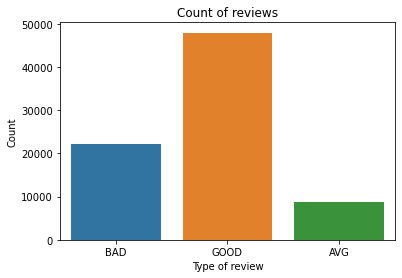

In [81]:
from datetime import datetime

ax = sns.countplot(
    data = ct,
    x = ct['type_of_review']
)
ax.set_title('Count of reviews')
ax.set_ylabel('Count')
ax.set_xlabel('Type of review')

## Beauty dataset

In [82]:
def parse(filename):
  f = open(filename, 'r')
  entry = {}
  for l in f:
    l = l.strip()
    colonPos = l.find(':')
    if colonPos == -1:
      yield entry
      entry = {}
      continue
    eName = l[:colonPos]
    rest = l[colonPos+2:]
    entry[eName] = rest
  yield entry

In [83]:
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [84]:
bt = getDF('Beauty.txt')

In [85]:
bt

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A1FWT811DSZLC8,Heidi M,0/0,3.0,1360368000,doesn't last,very light scent that doesn't last very long. ...
1,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A1THE6V6O8ROD4,"Donna Mpaulin ""PURPLE RAVEN""",0/0,5.0,1358467200,Smells divine.,"This is my second bottle of sheer freesia, I j..."
2,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A176IQ7MVD3N6T,M. Avila,0/0,1.0,1357084800,Very disappointed!,This perfume is just AWFUL! Smells nothing lik...
3,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A34BDX4JVMG23Y,Kim M. Colt,0/0,5.0,1326240000,Nice gift,This was a gift for my sister. It wowed her. S...
4,B000K5JBZU,Optimum Care Anti-Breakage Therapy Moisture Re...,5.99,A3UWJXJI7S3T05,PloveJ,1/1,5.0,1351987200,TRULY MADE A DIFFERENCE!,I have been using this product for a couple ye...
...,...,...,...,...,...,...,...,...,...,...
252051,B000FKGRSO,"Artec Kiwi Coloreflector Shine Wax, 2-Ounce Ja...",unknown,AGEYHIE3Y3NUR,J. Hatten,0/0,5.0,1157155200,ARTEC Kiwi Coloreflector shine wax,I have really enjoyed this product. It has a g...
252052,B00025X06E,Goldleaf Perfumed Body Cream 230ml,28.00,A3M174IC0VXOS2,Gail Cooke,1/1,5.0,1250467200,A SWEET SCENT,Since its founding in 1982 Thymes has won legi...
252053,B00025X06E,Goldleaf Perfumed Body Cream 230ml,28.00,A2SZ9BG00RYAHG,&#34;Janie&#34;,0/0,5.0,1262476800,Luscious!!!,I love love love this item!!! The scent is lik...
252054,B000BR64OS,Guerlain Vetiver Eau de Toilette,unknown,A13NEK0V8EMHPO,PA Fishing Maps,6/6,2.0,1321228800,This is the new formula- NOT vintage as pictured,Received the order very quickly but what arriv...


In [86]:
with open('Beauty.txt', newline = '') as sales:
    lines = [sale for sale in csv.reader(sales, delimiter='\n') if sale!=[]]


In [87]:
tmp = []
for i in lines:
    for j in i:
        tmp.append(j.split(': '))


In [88]:
length_tmp = len(tmp)
productid =[tmp[i][1] for i in range(0,int(length_tmp),10)]
title =[tmp[i+1][1] for i in range(0,int(length_tmp),10)]
price=[tmp[i+2][1] for i in range(0,int(length_tmp),10)]
userID=[tmp[i+3][1] for i in range(0,int(length_tmp),10)]
profileName =[tmp[i+4][1] for i in range(0,int(length_tmp),10)]
helpfulness = [tmp[i+5][1] for i in range(0,int(length_tmp),10)]
score = [tmp[i+6][1] for i in range(0,int(length_tmp),10)]
time = [tmp[i+7][1] for i in range(0,int(length_tmp),10)]
summary = [tmp[i+8][1] for i in range(0,int(length_tmp),10)]
text = [tmp[i+9][1] for i in range(0,int(length_tmp),10)]

In [89]:
del(tmp,length_tmp)

In [90]:
bt = pd.DataFrame({
    'ProductID':productid,
    'Product_Name':title,
    'Price':price,
    'userID':userID,
    'User_Name':profileName,
    'helpfulness':helpfulness,
    'rate':score,
    'time':time,
    'summary':summary,
    'text':text
})
bt

,ProductID,Product_Name,Price,userID,User_Name,helpfulness,rate,time,summary,text
0,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A1FWT811DSZLC8,Heidi M,0/0,3.0,1360368000,doesn't last,very light scent that doesn't last very long. ...
1,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A1THE6V6O8ROD4,"Donna Mpaulin ""PURPLE RAVEN""",0/0,5.0,1358467200,Smells divine.,"This is my second bottle of sheer freesia, I j..."
2,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A176IQ7MVD3N6T,M. Avila,0/0,1.0,1357084800,Very disappointed!,This perfume is just AWFUL! Smells nothing lik...
3,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A34BDX4JVMG23Y,Kim M. Colt,0/0,5.0,1326240000,Nice gift,This was a gift for my sister. It wowed her. S...
4,B000K5JBZU,Optimum Care Anti-Breakage Therapy Moisture Re...,5.99,A3UWJXJI7S3T05,PloveJ,1/1,5.0,1351987200,TRULY MADE A DIFFERENCE!,I have been using this product for a couple ye...
...,...,...,...,...,...,...,...,...,...,...
252051,B000FKGRSO,"Artec Kiwi Coloreflector Shine Wax, 2-Ounce Ja...",unknown,AGEYHIE3Y3NUR,J. Hatten,0/0,5.0,1157155200,ARTEC Kiwi Coloreflector shine wax,I have really enjoyed this product. It has a g...
252052,B00025X06E,Goldleaf Perfumed Body Cream 230ml,28.00,A3M174IC0VXOS2,Gail Cooke,1/1,5.0,1250467200,A SWEET SCENT,Since its founding in 1982 Thymes has won legi...
252053,B00025X06E,Goldleaf Perfumed Body Cream 230ml,28.00,A2SZ9BG00RYAHG,&#34;Janie&#34;,0/0,5.0,1262476800,Luscious!!!,I love love love this item!!! The scent is lik...
252054,B000BR64OS,Guerlain Vetiver Eau de Toilette,unknown,A13NEK0V8EMHPO,PA Fishing Maps,6/6,2.0,1321228800,This is the new formula- NOT vintage as pictured,Received the order very quickly but what arriv...


In [91]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252056 entries, 0 to 252055
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ProductID     252056 non-null  object
 1   Product_Name  252056 non-null  object
 2   Price         252056 non-null  object
 3   userID        252056 non-null  object
 4   User_Name     252056 non-null  object
 5   helpfulness   252056 non-null  object
 6   rate          252056 non-null  object
 7   time          252056 non-null  object
 8   summary       252056 non-null  object
 9   text          252056 non-null  object
dtypes: object(10)
memory usage: 19.2+ MB


In [92]:
bt= bt.replace('unknown',0)

In [93]:
bt = bt.astype({'Price':'float64',
          'rate': 'float64',
          })

In [94]:
bt = bt.replace(0.0,np.NaN)

In [95]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252056 entries, 0 to 252055
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ProductID     252056 non-null  object 
 1   Product_Name  252056 non-null  object 
 2   Price         213268 non-null  float64
 3   userID        248872 non-null  object 
 4   User_Name     248871 non-null  object 
 5   helpfulness   252056 non-null  object 
 6   rate          252056 non-null  float64
 7   time          252056 non-null  object 
 8   summary       252056 non-null  object 
 9   text          252056 non-null  object 
dtypes: float64(2), object(8)
memory usage: 19.2+ MB


In [96]:
bt['type_of_review'] = bt['rate'].apply(lambda rate: "GOOD" if rate>=4.0 else ("AVG" if rate<4.0 and rate>=3.0 else "BAD"))
reviews = bt[['text','type_of_review']]

In [97]:
bt

,ProductID,Product_Name,Price,userID,User_Name,helpfulness,rate,time,summary,text,type_of_review
0,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A1FWT811DSZLC8,Heidi M,0/0,3.0,1360368000,doesn't last,very light scent that doesn't last very long. ...,AVG
1,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A1THE6V6O8ROD4,"Donna Mpaulin ""PURPLE RAVEN""",0/0,5.0,1358467200,Smells divine.,"This is my second bottle of sheer freesia, I j...",GOOD
2,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A176IQ7MVD3N6T,M. Avila,0/0,1.0,1357084800,Very disappointed!,This perfume is just AWFUL! Smells nothing lik...,BAD
3,B00064C0IU,Oscar Eau de Toilette for Women by Oscar de La...,24.19,A34BDX4JVMG23Y,Kim M. Colt,0/0,5.0,1326240000,Nice gift,This was a gift for my sister. It wowed her. S...,GOOD
4,B000K5JBZU,Optimum Care Anti-Breakage Therapy Moisture Re...,5.99,A3UWJXJI7S3T05,PloveJ,1/1,5.0,1351987200,TRULY MADE A DIFFERENCE!,I have been using this product for a couple ye...,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
252051,B000FKGRSO,"Artec Kiwi Coloreflector Shine Wax, 2-Ounce Ja...",NaN,AGEYHIE3Y3NUR,J. Hatten,0/0,5.0,1157155200,ARTEC Kiwi Coloreflector shine wax,I have really enjoyed this product. It has a g...,GOOD
252052,B00025X06E,Goldleaf Perfumed Body Cream 230ml,28.00,A3M174IC0VXOS2,Gail Cooke,1/1,5.0,1250467200,A SWEET SCENT,Since its founding in 1982 Thymes has won legi...,GOOD
252053,B00025X06E,Goldleaf Perfumed Body Cream 230ml,28.00,A2SZ9BG00RYAHG,&#34;Janie&#34;,0/0,5.0,1262476800,Luscious!!!,I love love love this item!!! The scent is lik...,GOOD
252054,B000BR64OS,Guerlain Vetiver Eau de Toilette,NaN,A13NEK0V8EMHPO,PA Fishing Maps,6/6,2.0,1321228800,This is the new formula- NOT vintage as pictured,Received the order very quickly but what arriv...,BAD


Text(0.5, 0, 'Type of review')

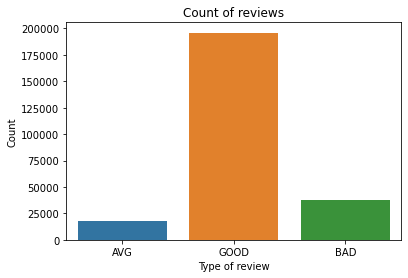

In [98]:
from datetime import datetime

ax = sns.countplot(
    data = bt,
    x = bt['type_of_review']
)
ax.set_title('Count of reviews')
ax.set_ylabel('Count')
ax.set_xlabel('Type of review')

In [99]:
from datetime import datetime

bt['time'] = bt['time'].apply(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d'))

In [100]:
bt['time'] = pd.to_datetime(bt['time'])
bt['year'] = [x.year for x in bt['time']]

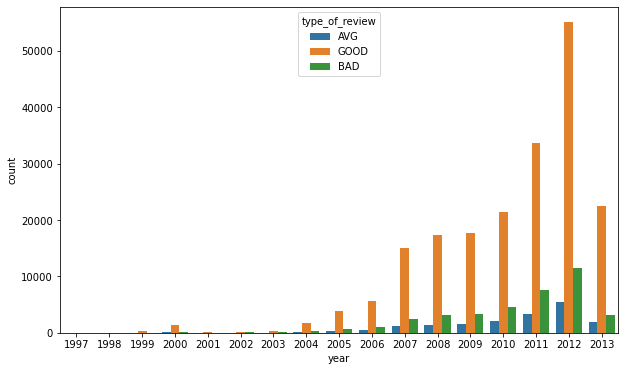

In [101]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(
    ax=ax,
    data = bt,
    x = bt['year'],
    hue = bt['type_of_review']
)
maxi = int(bt['year'].mode())

# PHASE 2

In [19]:
wt

,ProductID,Product_Name,Price,userID,User_Name,helpfulness,rate,time,summary,text,type_of_review
0,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,NaN,AEM9CCSE7CQ9M,"Charlie White ""Tech-Guy""",0/0,4.0,1260230400,"Unique G-Shock Design, same G-Shock Quality",Having owned two previous G-Shocks in my life ...,GOOD
1,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,NaN,AA6ESFOYCNJKG,Marco Antonio Hernandez Lara,0/0,4.0,1216339200,Nice Watch,"Thats a good watch, light, comfortable, accura...",GOOD
2,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,NaN,A2X0RB3JKV4E7C,Mary Perez,1/2,5.0,1245024000,Is it battery powered or Solar/,I am ready to purchase this beautiful watch bu...,GOOD
3,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",NaN,AIZ446JTDW9B5,Mike Robbins,3/3,5.0,1122422400,2005 Latest Seiko Diver Models,2005 Latest model from Seiko Model SKXA53K2. P...,GOOD
4,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",NaN,A28JAKWAGDDXWF,Tukwillie,0/0,4.0,1207958400,Great watch with a few drawbacks,Here are a few observations on one of my favor...,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
68351,B000LET1KU,Seiko Kinetic Diver Orange Dial Mens Watch SKA291,NaN,A2Q1V8EBYFMXSO,"Donald L. Buckle ""Number 2 Amazon Fan""",0/1,3.0,1249171200,Great watch with terrible band,A good dive watch with a terribly uncomfortabl...,AVG
68352,B000I5M96A,SeikoClock - QXA393SRH (Size,NaN,A2YDSCQB2W0C8S,"Sanjay N. Patel ""Thoomplonk""",1/1,5.0,1209686400,Quiet Sweep Wall clock,Very elegant contemporary looking quiet sweep ...,GOOD
68353,B000I5M96A,SeikoClock - QXA393SRH (Size,NaN,A247QMDU9ZQASZ,M. Imhoff,0/0,3.0,1272844800,Was quiet at first,"I bought this clock two years ago, and it was ...",AVG
68354,B000ISLYYK,New Philip Persio Leather Biker Cuff Mens Squa...,NaN,A1LRT7C0CP8M3S,Papou,0/0,4.0,1181347200,Good quality Watch,The watch in itself is quite good and it is ju...,GOOD


In [20]:
from sklearn.metrics import pairwise_distances 

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [21]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68356 entries, 0 to 68355
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductID       68356 non-null  object 
 1   Product_Name    68356 non-null  object 
 2   Price           37561 non-null  float64
 3   userID          68034 non-null  object 
 4   User_Name       68034 non-null  object 
 5   helpfulness     68356 non-null  object 
 6   rate            68356 non-null  float64
 7   time            68356 non-null  object 
 8   summary         68355 non-null  object 
 9   text            68356 non-null  object 
 10  type_of_review  68356 non-null  object 
dtypes: float64(2), object(9)
memory usage: 5.7+ MB


In [22]:
df = pd.DataFrame([wt.userID,wt.ProductID,wt.rate]).transpose()

In [23]:
df

,userID,ProductID,rate
0,AEM9CCSE7CQ9M,B000NLZ4A2,4.0
1,AA6ESFOYCNJKG,B000NLZ4A2,4.0
2,A2X0RB3JKV4E7C,B000NLZ4A2,5.0
3,AIZ446JTDW9B5,B000AIO6RA,5.0
4,A28JAKWAGDDXWF,B000AIO6RA,4.0
...,...,...,...
68351,A2Q1V8EBYFMXSO,B000LET1KU,3.0
68352,A2YDSCQB2W0C8S,B000I5M96A,5.0
68353,A247QMDU9ZQASZ,B000I5M96A,3.0
68354,A1LRT7C0CP8M3S,B000ISLYYK,4.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68356 entries, 0 to 68355
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userID     68034 non-null  object
 1   ProductID  68356 non-null  object
 2   rate       68356 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [25]:
df = df.astype({'rate': 'float64',})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68356 entries, 0 to 68355
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userID     68034 non-null  object 
 1   ProductID  68356 non-null  object 
 2   rate       68356 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


In [27]:
new_df=df.groupby("ProductID").filter(lambda x:x['rate'].count() >=50)

In [28]:
new_df

,userID,ProductID,rate
210,A1FH03H1TT7QBL,B000DT8SY8,5.0
211,A1S5ZRODIQCL6D,B000DT8SY8,4.0
212,AI995TUS4VZ8U,B000DT8SY8,5.0
213,ASJG0YSL1B89O,B000DT8SY8,4.0
214,A10YWV8KH1TJ1O,B000DT8SY8,5.0
...,...,...,...
68238,A12ARJOHVCIQYN,B000BDDF30,5.0
68239,AVMQ6AX8D3A8W,B000BDDF30,5.0
68240,A1CTSPWPGCYS54,B000BDDF30,2.0
68241,A90GS0O7N6691,B000BDDF30,5.0


In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27340 entries, 210 to 68242
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userID     27260 non-null  object 
 1   ProductID  27340 non-null  object 
 2   rate       27340 non-null  float64
dtypes: float64(1), object(2)
memory usage: 854.4+ KB


In [30]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [57]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [58]:
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [59]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [60]:
test_pred = algo.test(testset)

In [61]:
test_pred

[Prediction(uid='A2RSO0JRWM2J6P', iid='B000GAYQKO', r_ui=3.0, est=2.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ARHAAMLX41NI0', iid='B000DT8SY8', r_ui=3.0, est=4.189622740098234, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='ADA54AFU4W1BJ', iid='B000EQU0NW', r_ui=4.0, est=4.189622740098234, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AD6UC2NLWYLSK', iid='B00093CZVA', r_ui=5.0, est=4.189622740098234, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AVD1LGMDTQ15R', iid='B000FPX5WU', r_ui=5.0, est=4.189622740098234, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3SZ9PSLP5J9X8', iid='B000PL16UM', r_ui=4.0, est=4.189622740098234, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3KUABQGWJJ9BN', iid='B0007P4B6M', r_ui=5.0, est=4.1896

In [62]:
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.2255


1.2254965409195573

In [63]:
new_df.isnull()

,userID,ProductID,rate
210,False,False,False
211,False,False,False
212,False,False,False
213,False,False,False
214,False,False,False
...,...,...,...
68238,False,False,False
68239,False,False,False
68240,False,False,False
68241,False,False,False


In [30]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='rate', index='userID', columns='ProductID', fill_value=0)
ratings_matrix.head()

ProductID,B0000BX8L1,B0000C9ZBQ,B0000C9ZBW,B0000C9ZBX,B0000C9ZBY,B0000C9ZBZ,B0000UIY3U,B0001HIT1Y,B00024WL92,B0002M9SDG,...,B000GB1R8W,B000GB1RAA,B000GB1RAU,B000GB1RBY,B000GDC5KO,B000H6758C,B000H7G3NO,B000RNPJII,B000SQM5PE,B000SZNSVA
userID,,,,,,,,,,,,,,,,,,,,,
A00219682P7VSC0F8HLCU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00859153MLXIP2YVLG0S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01069191W4W3PK41V3MB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A047391122OTP4EMJ6STS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A06908902R3PJYHYBAT9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0


In [31]:
ratings_matrix.shape

(9768, 82)

In [32]:
ratings_matrix['user_index'] = np.arange(0, ratings_matrix.shape[0], 1)
ratings_matrix.head()

ProductID,B0000BX8L1,B0000C9ZBQ,B0000C9ZBW,B0000C9ZBX,B0000C9ZBY,B0000C9ZBZ,B0000UIY3U,B0001HIT1Y,B00024WL92,B0002M9SDG,...,B000GB1RAA,B000GB1RAU,B000GB1RBY,B000GDC5KO,B000H6758C,B000H7G3NO,B000RNPJII,B000SQM5PE,B000SZNSVA,user_index
userID,,,,,,,,,,,,,,,,,,,,,
A00219682P7VSC0F8HLCU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00859153MLXIP2YVLG0S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A01069191W4W3PK41V3MB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
A047391122OTP4EMJ6STS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
A06908902R3PJYHYBAT9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,4


In [33]:
ratings_matrix.set_index(['user_index'], inplace=True)
ratings_matrix.head()

ProductID,B0000BX8L1,B0000C9ZBQ,B0000C9ZBW,B0000C9ZBX,B0000C9ZBY,B0000C9ZBZ,B0000UIY3U,B0001HIT1Y,B00024WL92,B0002M9SDG,...,B000GB1R8W,B000GB1RAA,B000GB1RAU,B000GB1RBY,B000GDC5KO,B000H6758C,B000H7G3NO,B000RNPJII,B000SQM5PE,B000SZNSVA
user_index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0


In [34]:
ratings_matrix

ProductID,B0000BX8L1,B0000C9ZBQ,B0000C9ZBW,B0000C9ZBX,B0000C9ZBY,B0000C9ZBZ,B0000UIY3U,B0001HIT1Y,B00024WL92,B0002M9SDG,...,B000GB1R8W,B000GB1RAA,B000GB1RAU,B000GB1RBY,B000GDC5KO,B000H6758C,B000H7G3NO,B000RNPJII,B000SQM5PE,B000SZNSVA
user_index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

In [36]:
U, sigma, Vt = svds(ratings_matrix, k = 10)

In [37]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [[ 3.23006645e-05  5.68468736e-07  6.81287770e-02 ... -2.76250073e-04
   6.20171953e-05 -3.76109334e-06]
 [ 1.02260989e-09  2.34378644e-05  5.09376914e-08 ...  1.55856811e-07
   8.37875583e-05 -1.70566127e-06]
 [-9.64170748e-13  5.29292498e-15  6.95253551e-13 ... -4.37254963e-14
   2.26344483e-14 -2.52290377e-15]
 ...
 [-9.64170748e-13  5.29292498e-15  6.95253551e-13 ... -4.37254963e-14
   2.26344483e-14 -2.52290377e-15]
 [-3.13990728e-10  1.49021330e-07 -5.89450635e-07 ...  1.65720093e-06
   1.16495563e-04 -1.53635130e-06]
 [-1.43301372e-07 -1.42669638e-07 -3.48976152e-04 ... -5.41779530e-02
   3.81922266e-04 -6.76811572e-04]]


In [38]:
print('Sigma: \n',sigma)

Sigma: 
 [ 69.94442414  70.26656546  73.37993692  74.87615125  75.197506
  76.44966832  76.81894836  92.2696768  107.36323641 109.26345698]


In [39]:
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[ 69.94442414   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          70.26656546   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.          73.37993692   0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.          74.87615125   0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.          75.197506
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   76.44966832   0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.          76.81894836   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.        

In [40]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [[-9.81330650e-14  9.20712041e-09 -2.65465865e-10 -4.06436991e-08
  -2.74393507e-09  3.52448279e-17 -1.94115625e-11 -1.04633509e-11
  -1.12258664e-13  2.48875061e-18 -4.18418659e-08  4.07326018e-08
  -1.43176566e-08 -3.98015080e-08  1.04319757e-08  5.87397174e-06
  -2.82439096e-10 -2.22651924e-10 -1.51817877e-10 -2.06363599e-08
   1.20869651e-10  3.67936076e-08 -3.29896366e-10  3.49735077e-09
  -5.90385111e-17 -6.13061702e-18 -4.39238013e-09 -3.40144541e-07
   1.46987922e-06 -1.98692098e-10 -3.10681968e-18 -2.24794559e-11
  -3.97375903e-07 -8.67263733e-12  2.79665628e-17 -2.00462638e-06
  -9.66150319e-11 -2.64629076e-09 -1.44748751e-08 -3.47530110e-09
   1.88144395e-06  3.35730111e-08  2.11723617e-08 -1.12931561e-11
   1.43051720e-08 -5.89496499e-07 -3.66612022e-09 -1.31409356e-08
  -9.76700255e-11  2.95478141e-08 -5.17749678e-10  7.36154396e-09
  -4.80549212e-11 -6.44314921e-09  3.34697503e-17 -2.34494285e-09
   2.14559779e-08 -8.89835940e-03 -1.97666548e-10 -

In [41]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns)
preds_df.head()

ProductID,B0000BX8L1,B0000C9ZBQ,B0000C9ZBW,B0000C9ZBX,B0000C9ZBY,B0000C9ZBZ,B0000UIY3U,B0001HIT1Y,B00024WL92,B0002M9SDG,...,B000GB1R8W,B000GB1RAA,B000GB1RAU,B000GB1RBY,B000GDC5KO,B000H6758C,B000H7G3NO,B000RNPJII,B000SQM5PE,B000SZNSVA
0,-9.397371e-11,5.424211e-05,-1.324800e-06,-1.777512e-04,-1.662206e-05,4.174902e-16,-1.979643e-08,-7.182160e-08,-1.878802e-11,-1.754488e-16,...,-9.971986e-06,4.424724e-06,2.909784e-04,-3.369201e-04,-6.272675e-05,1.015427e-08,8.189281e-07,-4.841985e-16,2.131957e-02,-2.179079e-05
1,8.570050e-11,1.074293e-05,5.709350e-08,-1.223249e-04,1.184440e-05,6.464829e-20,2.109880e-08,5.704089e-06,-1.383919e-11,-7.760591e-19,...,-2.541519e-06,2.920839e-07,2.665206e-04,-4.016356e-08,3.203177e-05,7.987342e-09,1.390592e-04,-2.275983e-18,8.766475e-07,1.231215e-05
2,1.086547e-17,3.702422e-13,-1.239881e-14,-2.411453e-12,-3.795085e-13,4.069462e-26,2.675824e-15,6.977533e-15,3.289217e-17,-9.577224e-26,...,1.190615e-11,2.441223e-14,4.411020e-11,6.746028e-11,-1.040588e-12,1.287893e-15,1.780426e-11,-3.176911e-25,3.639930e-13,6.420299e-12
3,2.484372e-10,7.932158e-06,-3.678261e-08,-6.656401e-05,4.055684e-07,-7.057711e-18,6.614680e-08,1.369042e-05,3.838664e-12,7.555811e-20,...,4.395588e-04,3.891852e-06,6.453027e-06,6.655808e-08,4.966070e-05,1.845840e-10,3.681535e-06,-1.251419e-19,-3.234594e-08,-7.219228e-07
4,-1.007053e-13,2.430413e-07,-6.694582e-09,-9.841239e-07,-1.073536e-07,1.786951e-18,-1.380602e-11,-6.988299e-11,1.010649e-12,-7.513615e-19,...,3.506982e-07,1.961390e-08,2.568642e-06,-1.653040e-06,-3.718562e-07,8.202220e-11,5.248375e-07,-2.075291e-18,9.093354e-05,8.898021e-08


In [42]:
def recommend_items(userID, rating_matrix, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = ratings_matrix.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [44]:
i=int(input("Enter the user index:"))

Enter the user index:4


In [45]:
userID = i
num_recommendations = 5
recommend_items(userID, ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Items                                
B0006AAS7E                  0.0          0.087645
B0006AAS4M                  0.0          0.026371
B000EQR6H0                  0.0          0.000980
B000GAWSHM                  0.0          0.000977
B000GB1R5U                  0.0          0.000719


In [82]:
userID = 5
num_recommendations = 5
recommend_items(userID, ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 5):

                   user_ratings  user_predictions
Recommended Items                                
B000GB1R7S                  0.0          0.021320
B00074HDAO                  0.0          0.000221
B000GB1R5K                  0.0          0.000162
B000GAWS7W                  0.0          0.000161
B000EQR6H0                  0.0          0.000137


In [83]:
userID = 10
num_recommendations = 5
recommend_items(userID, ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 10):

                   user_ratings  user_predictions
Recommended Items                                
B000GB1R7S                  0.0          0.038017
B0006AAS4M                  0.0          0.027233
B000EQS1JW                  0.0          0.013660
B00074HDAO                  0.0          0.000470
B000GAWS7W                  0.0          0.000288


In [84]:
userID = 12
num_recommendations = 5
recommend_items(userID, ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 12):

                   user_ratings  user_predictions
Recommended Items                                
B000EQR6H0                  0.0          0.036655
B000GAWSDG                  0.0          0.021610
B000GAWSHM                  0.0          0.001098
B000GB1R5U                  0.0          0.000429
B000GB1R7S                  0.0          0.000291


In [86]:
userID = 1144
num_recommendations = 5
recommend_items(userID, ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 1144):

                   user_ratings  user_predictions
Recommended Items                                
B0007X9F74                  0.0          0.435462
B0000C9ZBQ                  0.0          0.003065
B000BEZTKG                  0.0          0.002865
B0001HIT1Y                  0.0          0.001503
B0000C9ZBY                  0.0          0.000438
